In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trp
import sys
from PIL import Image

### Loading Image In Python

In [3]:
image_BGR = cv2.imread('Rhein.jpeg')
img = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
arr = np.array(grey)



x_vals = np.linspace(0,255,500)
y_vals = np.linspace(0,255,500)

### Plotting Finction

In this function the image before an operation is shown left, a plot of the imageprocessing operation is shown in the middel and the resulting image after the operation is in the right.

In [4]:
def plot_results(input_img, output_img, x_values, y_values):
 
    plt.figure(figsize=(36,12))
    
    plt.subplot(131)
    plt.imshow(input_img, cmap='gray', vmin=0, vmax=255)
    plt.title('Input Image')
    plt.axis('off')
    
    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)
    
    plt.subplot(133)
    plt.imshow(output_img, cmap='gray', vmin=0, vmax=255)
    plt.title('Transformed Image')
    plt.axis('off')

## Histogram

In [5]:
def plot_histogram(picture_array):
    # Calculate image statistics
    print("Total number of pixels:", picture_array.size)
    print("Image dimensions:", picture_array.shape)
    # Storage calculation: N * M * log_2(F)
    print("Storage usage (KB):", (picture_array.shape[0] * picture_array.shape[1] * np.log2(256))/8/1024)
    
    # Create histogram using numpy's histogram function
    plt.hist(picture_array.ravel(), bins=256, range=(0, 255))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)

Total number of pixels: 1712000
Image dimensions: (1070, 1600)
Storage usage (KB): 1671.875


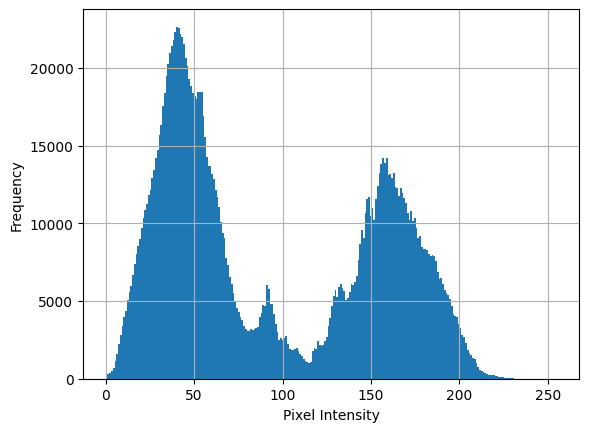

In [6]:
# unchanged histogram
plot_histogram(grey)

## Picture

Unchanged picture. \
Function which maps the input grayscale values of the image pixels to output greyscale values: \
$f(x) = x$ \
With $x \in [0,255]$ as input intensity values.

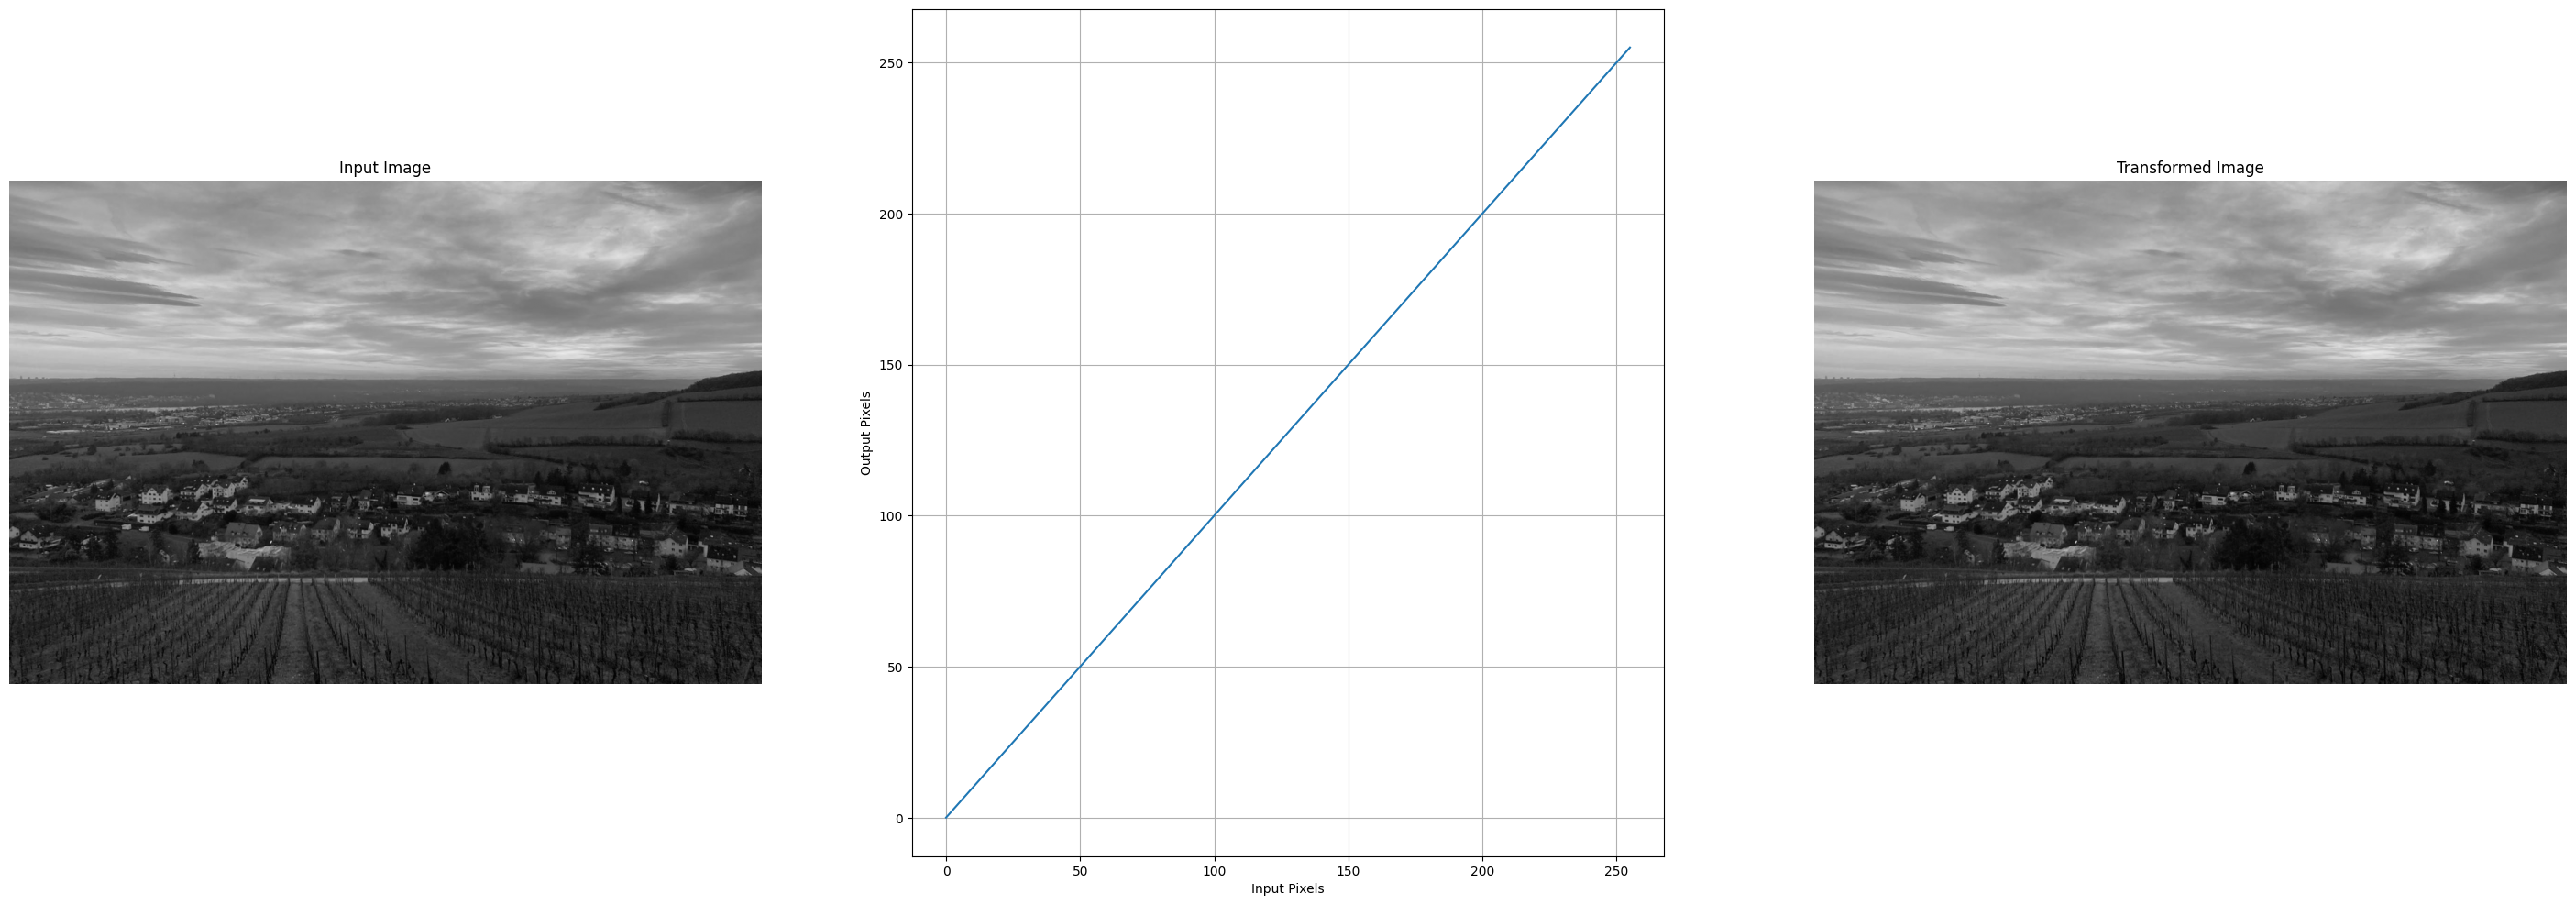

In [34]:
x_vals = np.linspace(0,255,500)
y_vals = np.linspace(0,255,500)
plot_results(np.array(grey),np.array(grey),x_vals, y_vals)


## Photographic Negative

Every greyscale value is inverted.\
With $x \in [0,255]$ for inputpixels:\
$f(x)= 255-x$

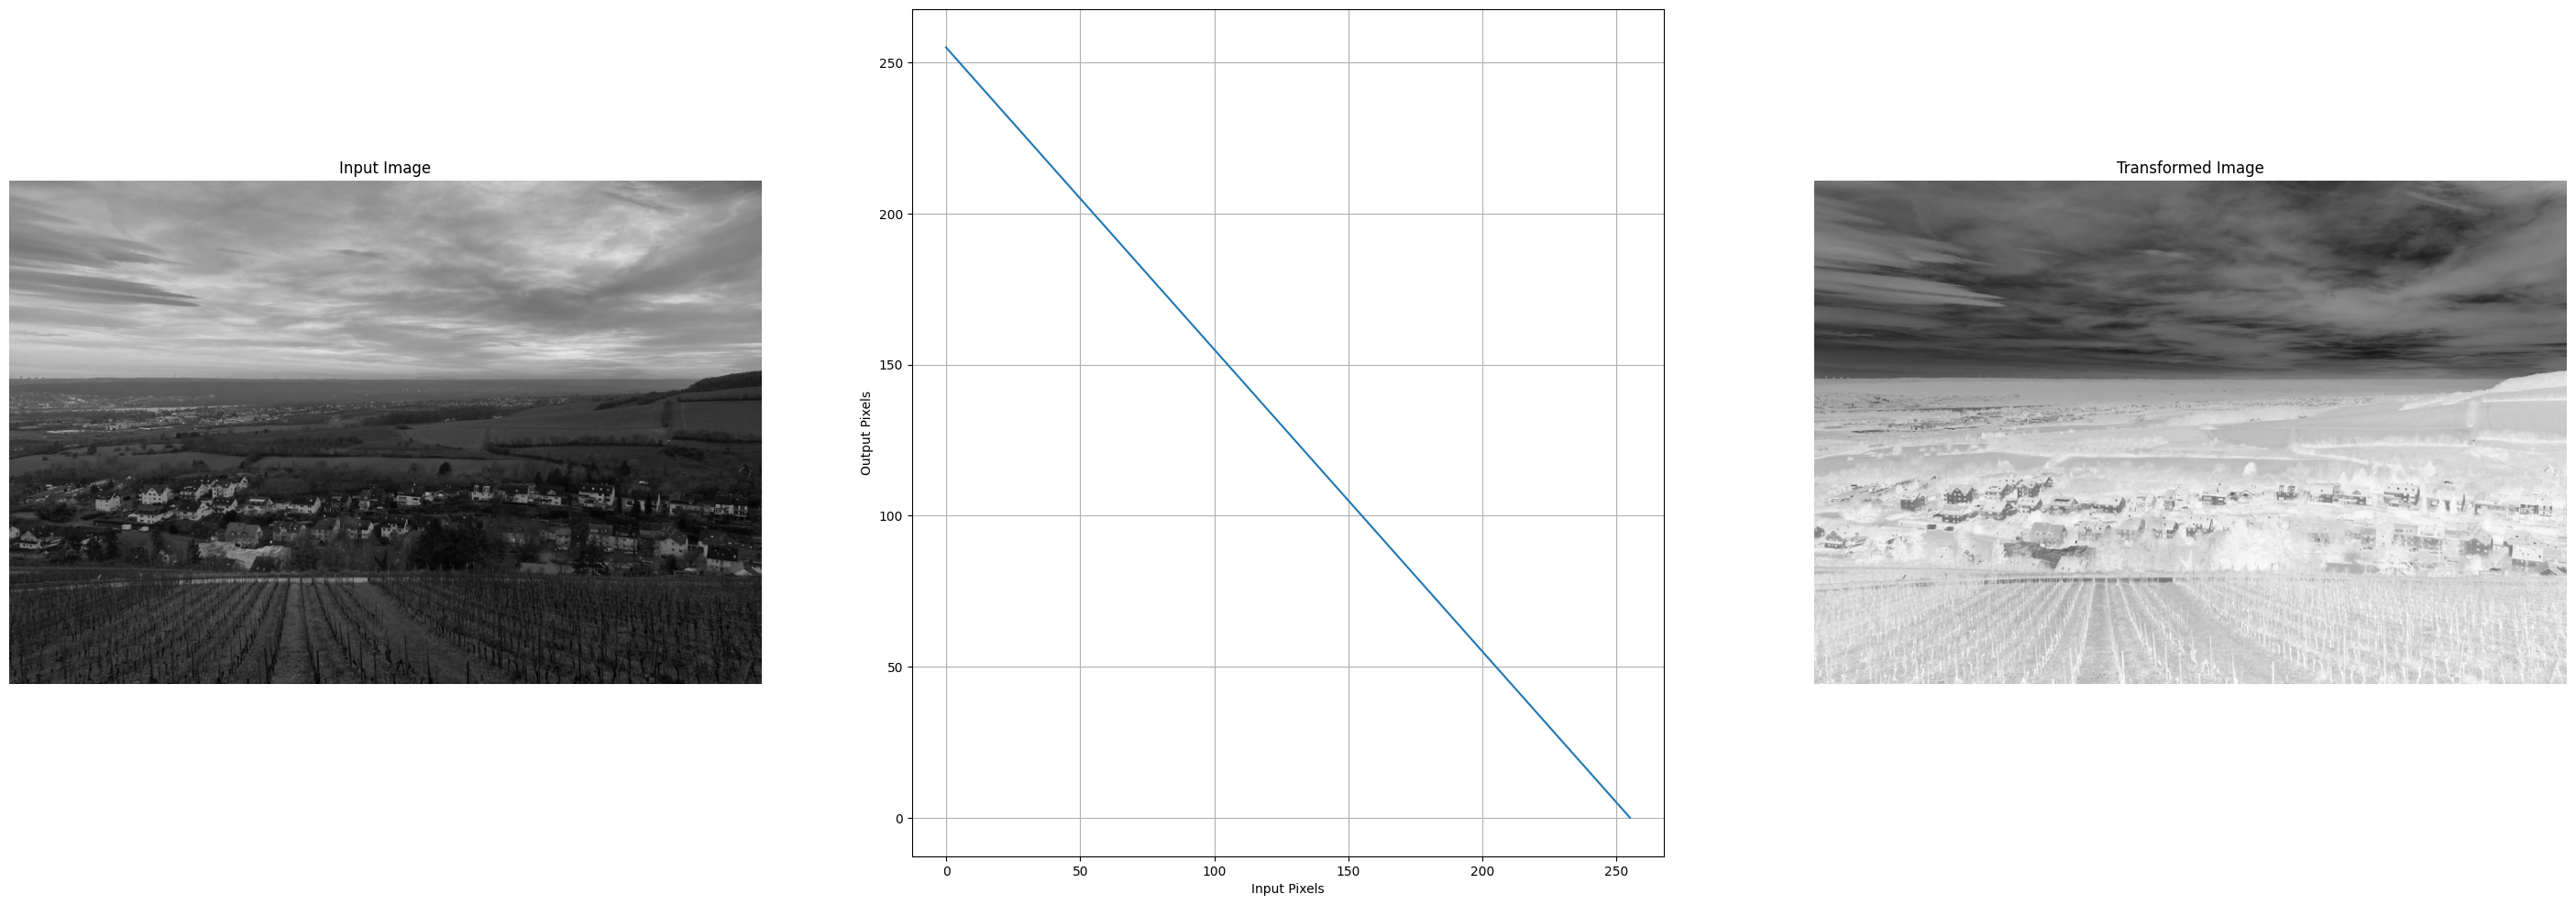

In [35]:
x_vals = np.linspace(0,255,500)
y_vals = np.linspace(0,255,500)

arr = np.array(grey)

def negative(val):
    return np.where(True, 255-val, 0)

y_vals = negative(x_vals)

plot_results(grey, negative(arr), x_vals, y_vals)


## Photographic Negative of Colored Images
In RGB color images, inversion is performed by subtracting each channel value from 255 

In [36]:
color_arr = np.array(img)
# color_arr.shape --> (1070, 1600, 3) 
negative_color = 255 - color_arr
negative_color_image = Image.fromarray(negative_color)
negative_color_image.show()

## Binarization

Binarization is the process of converting an image into black and white by applying a threshold value where pixels above the threshold become white (255) and below become black (0). \
Function with $x \in {0,255}$ for inputpixels: \
$f(x, t) = 
\begin{cases} 
0 & \text{if } x < t\\
255 & \text{if } x >= t\\
\end{cases}$ \
With $x \in [0,255]$ as greyscale value and $t$ as threshold.

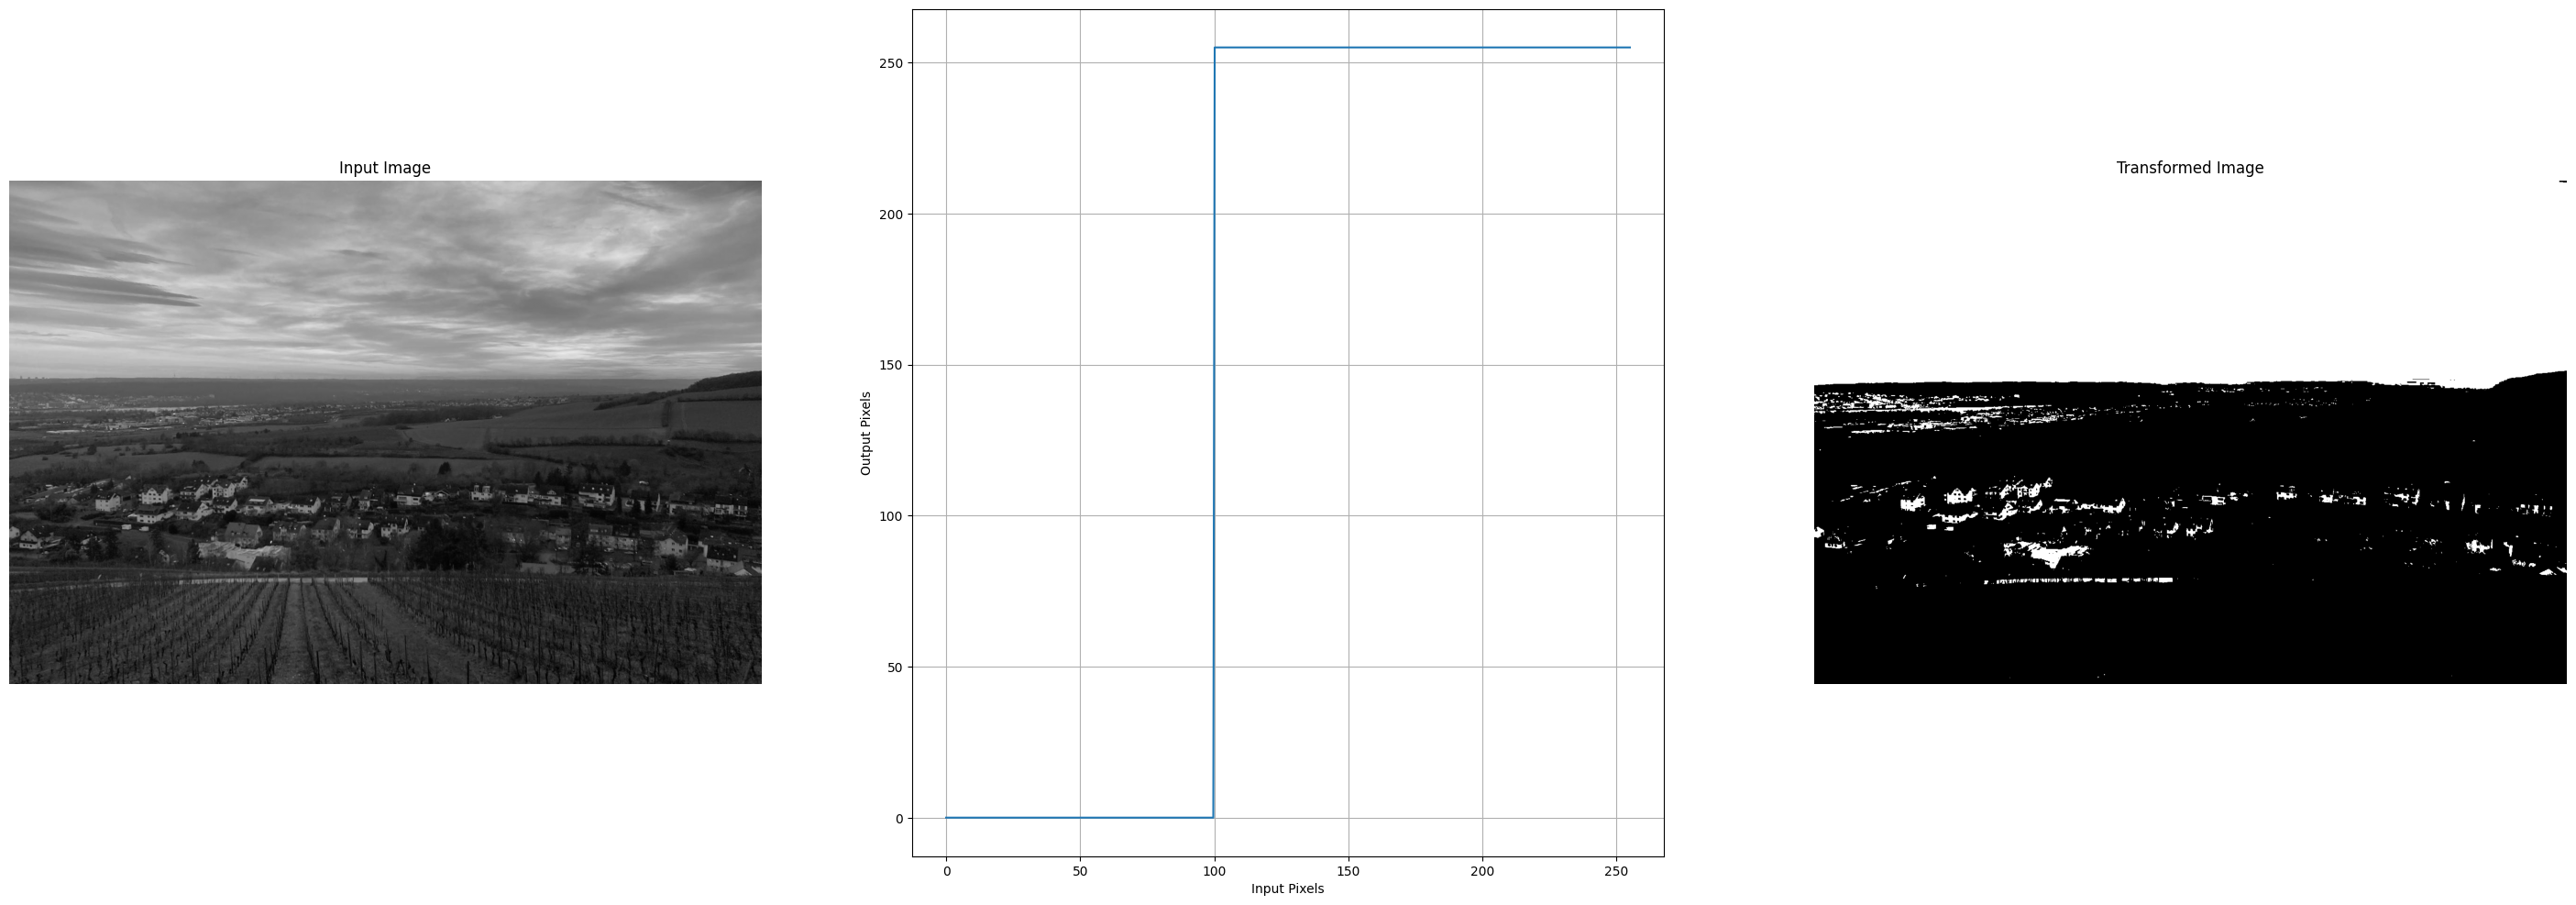

In [37]:
x_vals = np.linspace(0,255,500)
y_vals = np.linspace(0,255,500)

threshold = 100

def binarisation(val, threshold):
    return np.where(val >= threshold, 255, 0)

binary = binarisation(grey, threshold)
y_vals = binarisation(x_vals, threshold)

plot_results(grey, binary, x_vals, y_vals)

## Quantization
Quantization in image processing reduces the number of possible intensity values by mapping ranges of pixel values to a smaller set of discrete output levels. \
Function for intensities $0,128,190,255$: \
$f(x, t_1,t_2,t_3) = 
\begin{cases} 
0 & \text{if } x < t_1\\
128 & \text{if } x >= t_1 & \textbf{and} & x < t_2\\
190 & \text{if } x >= t_2 & \textbf{and} & x < t_3\\
255 & \text{if } x > t3\\
\end{cases}$ \
With $x \in [0,255]$ as greyscale value and $t$ as threshold.


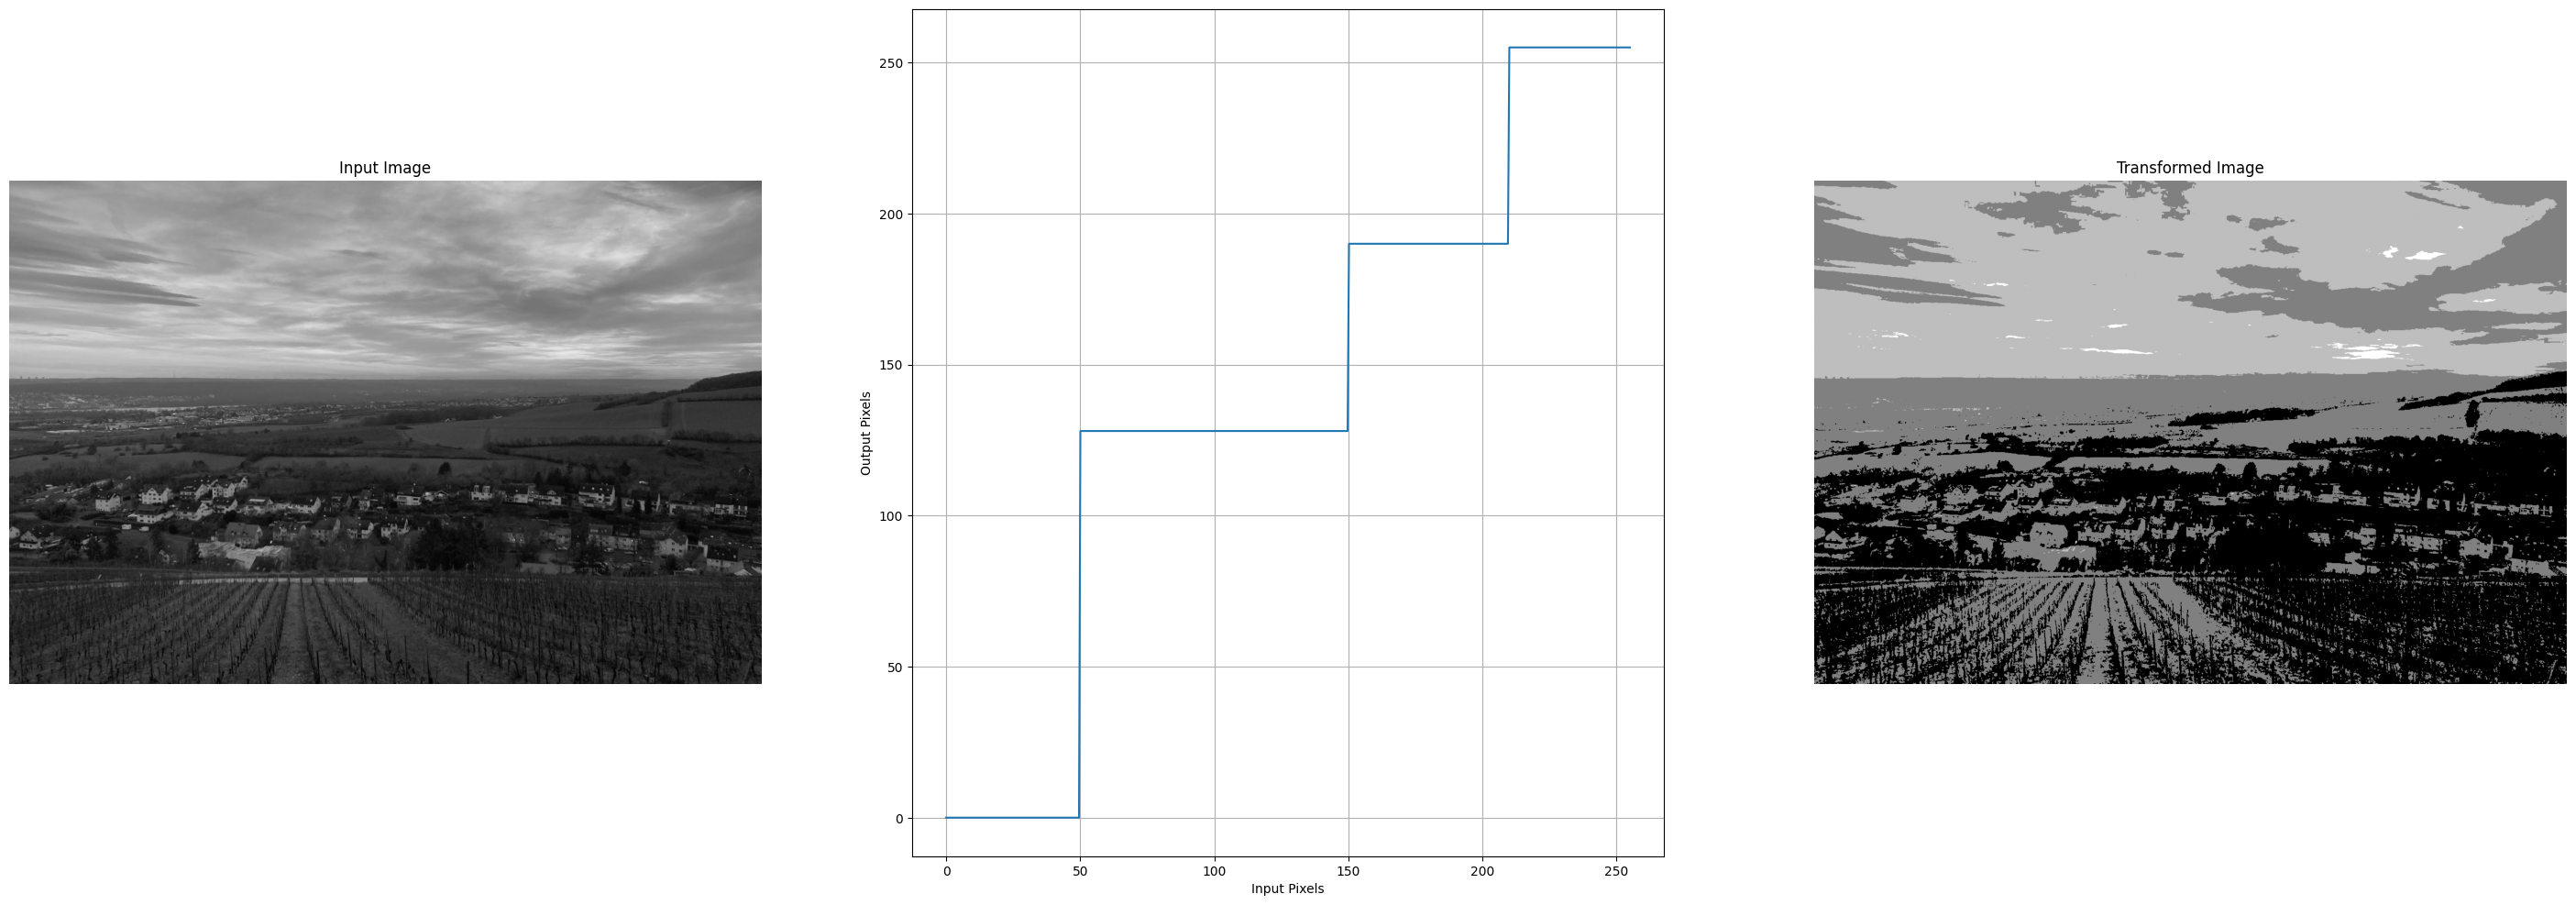

In [38]:
x_vals = np.linspace(0,255,500)
y_vals = np.linspace(0,255,500)

threshold_1 = 50
threshold_2 = 150
threshold_3 = 210

def quantisation(vals, th1, th2, th3):
    return np.where(vals < th1, 0, np.where((vals >= th1) & (vals < th2), 128, np.where((vals >= th2) & (vals < th3), 190,255)))
    
y_vals = quantisation(x_vals,threshold_1, threshold_2,threshold_3)    
quant = quantisation(grey,threshold_1,threshold_2,threshold_3)

plot_results(grey, quant, x_vals,y_vals)

## Bit-Plane Slicing

In an 8-bit grayscale image, each pixel has a value between 0 and 255, which corresponds to 8 bits in binary. Bit-plane slicing allows us to examine these different bit planes individually.
The higher bits (MSB) contain the main image structure, while lower bits (LSB) contain more subtle details and noise
All 8 lower pictures show images where only the corresponding bit at position 1-8 is is shown either with white or black.

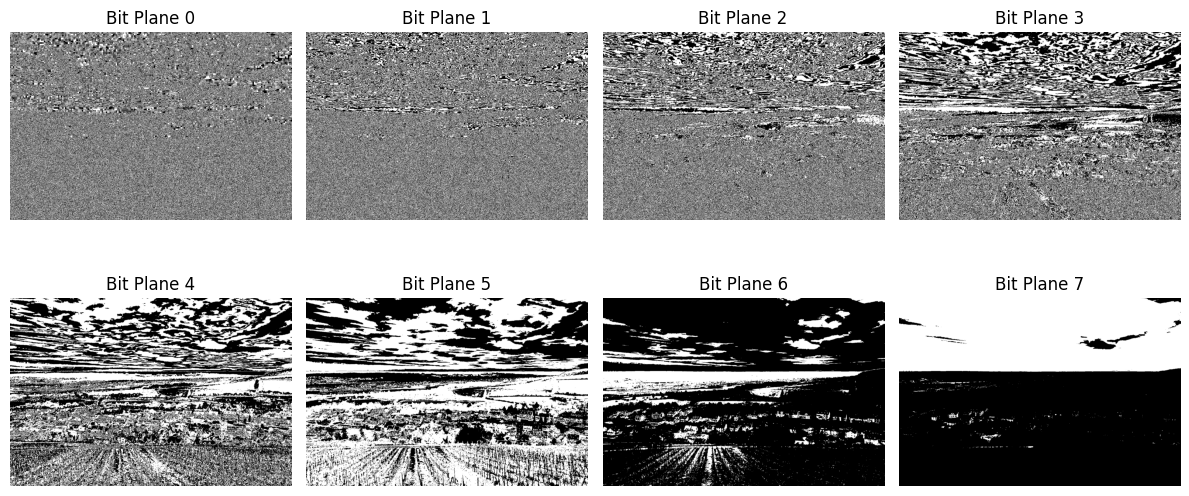

In [39]:
image = Image.open('Rhein.jpeg').convert('L')
image_array = np.array(image)

def extract_bit_plane(image_array, bit):
    # get pixel bit at a position, extract it and multiply it by 255 ---> if bit is 0 else 255 
    return ((image_array >> bit)&1) * 255 


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(8):
    bit_plane = extract_bit_plane(image_array, i)
    ax = axes[i // 4, i % 4]
    ax.imshow(bit_plane, cmap='gray')
    ax.set_title(f'Bit Plane {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Intensity Adjustment

In the following the outputpixel intensity of pixels only in a specified intensity window is changed. \
With $a$ and $b$ as window start and end values and $i$ as intensity value: \
$f(x,a,b,i) = 
\begin{cases} 
x & \text{if } x < a \quad and \quad x \geq b\\
i & \text{if } x \geq a \quad and \quad x \leq b\\
\end{cases}$ \
With $x \in [0,255]$ as input intensity values.

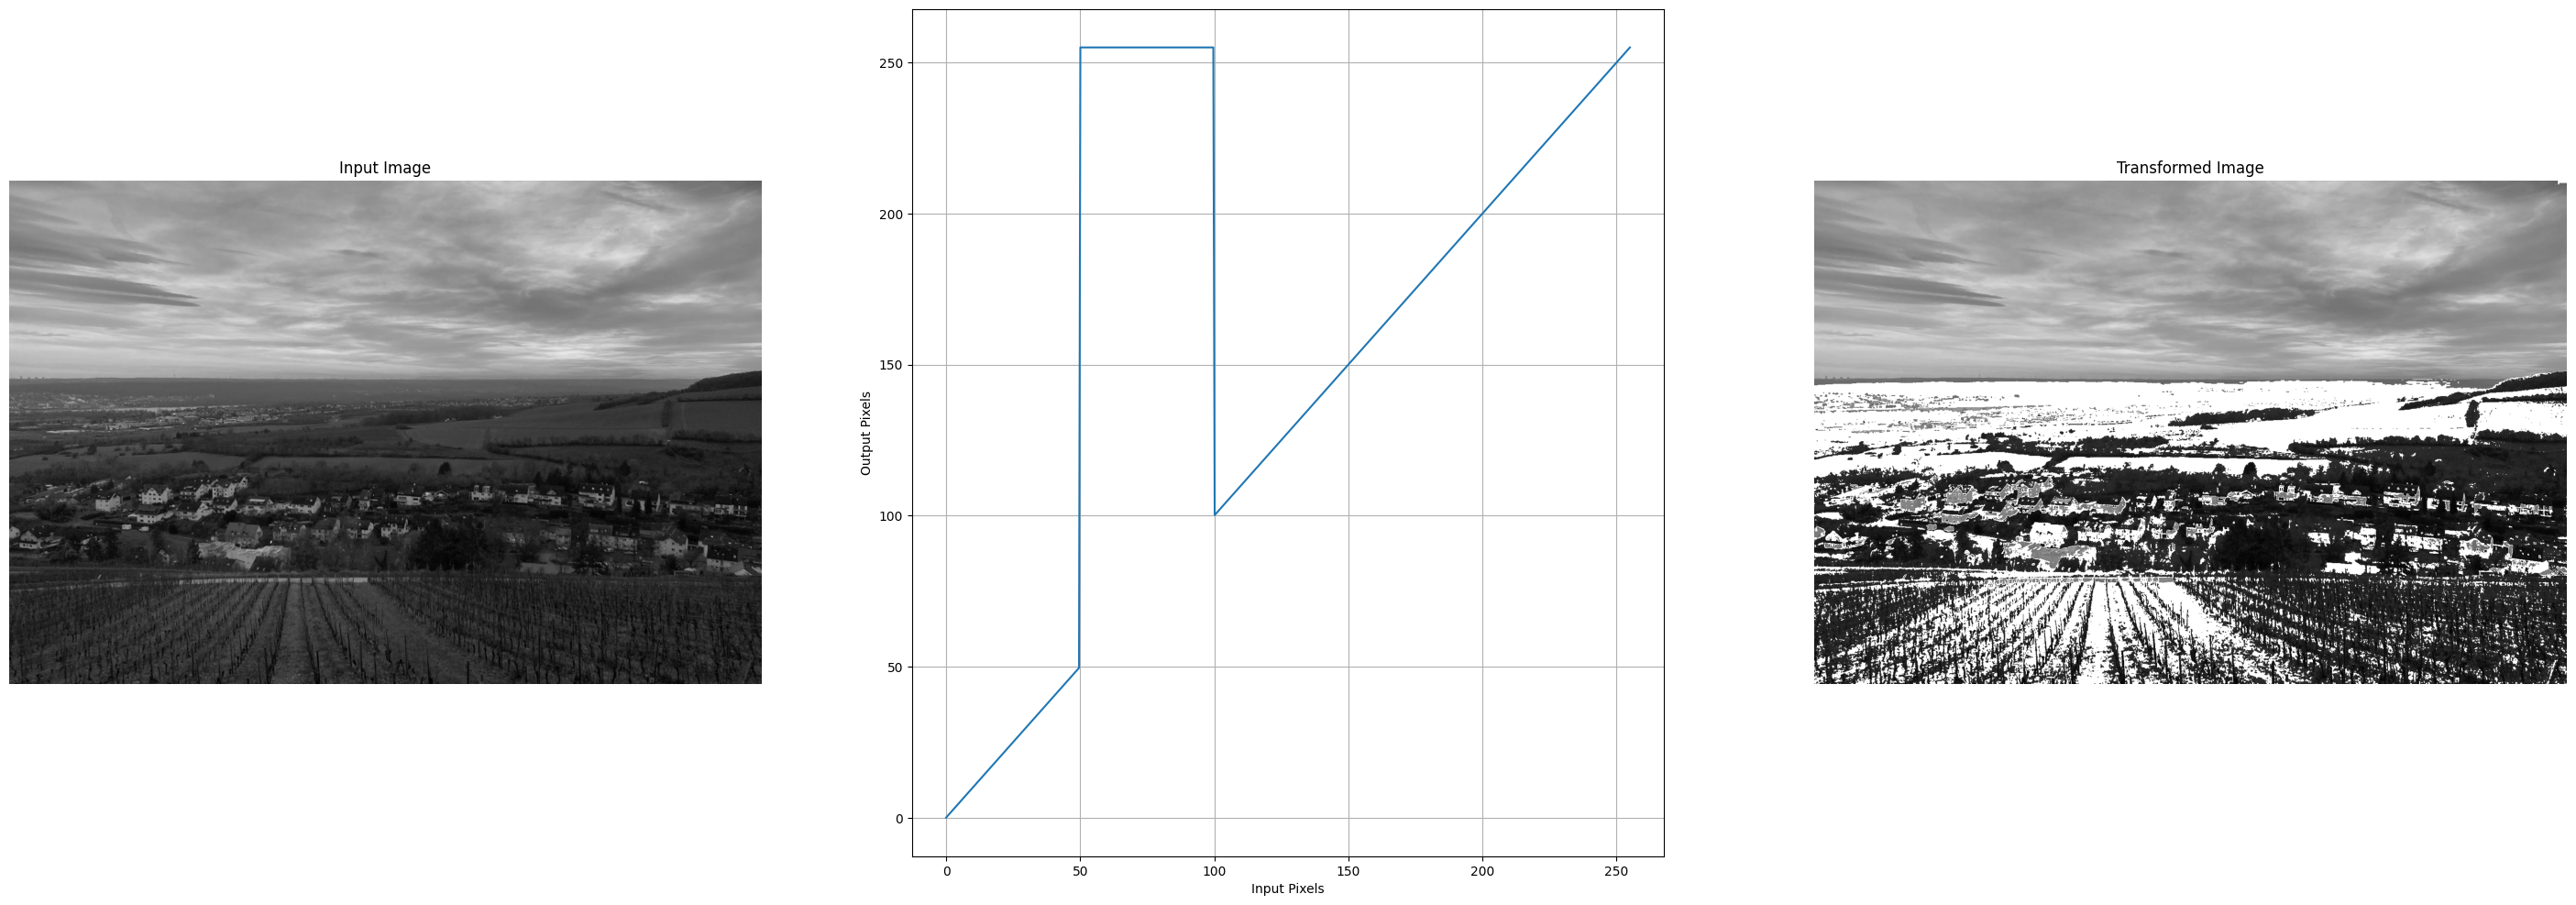

In [40]:
window_start = 50
window_end = 100

def bin_windowing(array, window_start, window_end):
    return np.where(array < window_start, array, np.where(array <= window_end, 255, array ))

bin_win = bin_windowing(grey, window_start, window_end)
y_vals = bin_windowing(x_vals, window_start, window_end)

plot_results(grey, bin_win, x_vals,y_vals)

## Brightness
Brightness in a Picture is changed by adding or subtracting a specific value to all image pixels. \
Function with $i \in \mathbb{N}$ as brightness value and $x \in [0,255]$ as input intensity values: \
$f(x,i) = 
\begin{cases} 
x + i & \text{if } x + i \geq  0 \quad and \quad x + i \leq 255\\
0 & \text{if } x + i < 0\\
255 & \text{if } x + i > 255\\
\end{cases}$ 

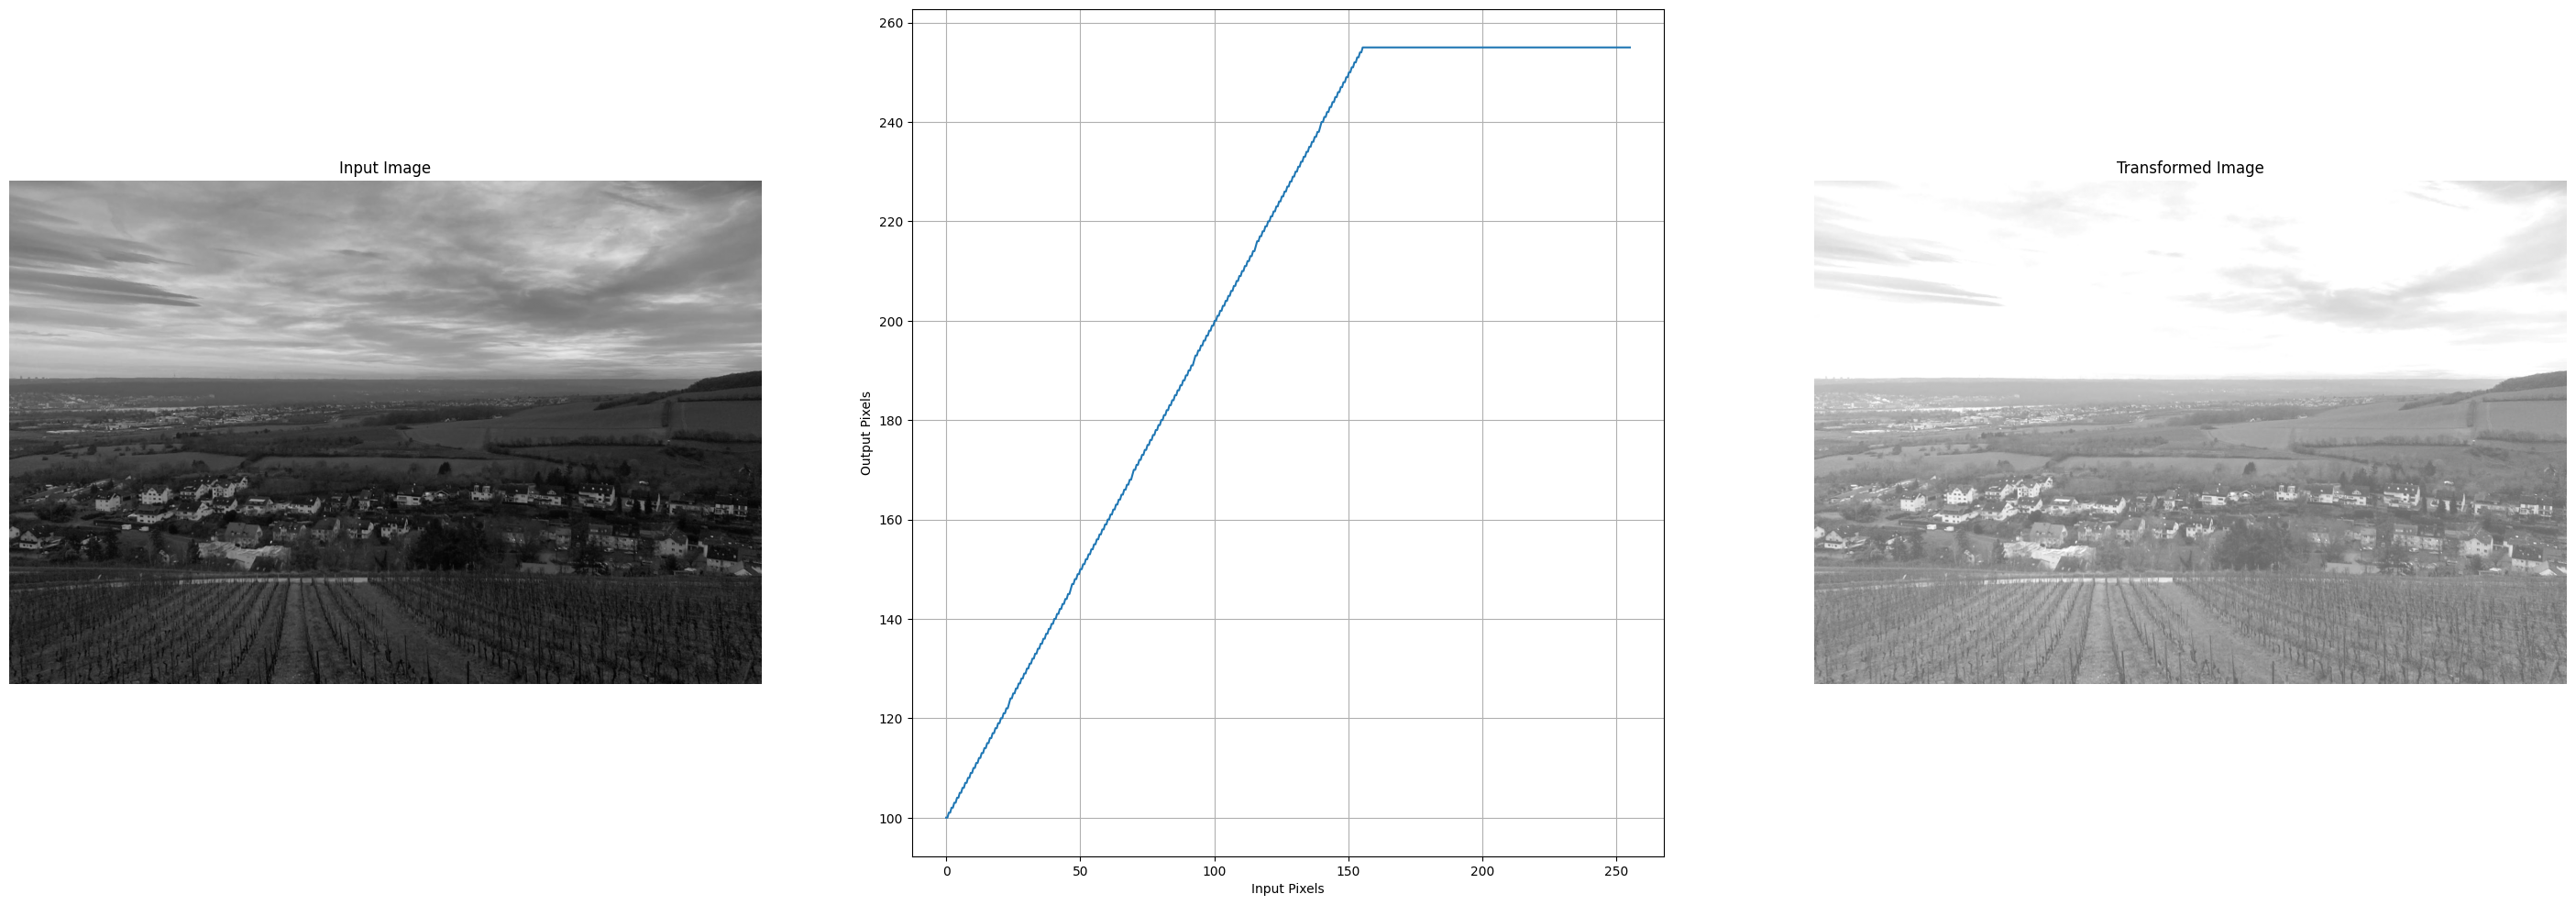

In [41]:
bright_val = 100

def brightness(array, bright_val):
    brightened_image = array.astype(np.int32) + bright_val
    return np.where(brightened_image < 0,0,np.where(brightened_image > 255,255,brightened_image))


y_vals = brightness(x_vals, bright_val)
plot_results(grey, brightness(grey, bright_val), x_vals, y_vals)

## Contrast Stretching And Compression

### Contrast Compression

Contrast reduces the range of intensity values, bringing them closer together. This reduces the difference between dark and bright areas, resulting in a more muted image.\
Funtion for each $x \in [0,255]$ in $\textbf{P}$ with $\textbf{P}$ as set of all imagepixels, $t_0$ as lower bound of the range, $t_1$ as upper bound of the range and  as input intensity values :\
$f(x) = \frac{x - min(\textbf{P})}{max(\textbf{P})-min(\textbf{P})} \cdot (t_1 - t_0) + t_0)$

Total number of pixels: 1712000
Image dimensions: (1070, 1600)
Storage usage (KB): 1671.875


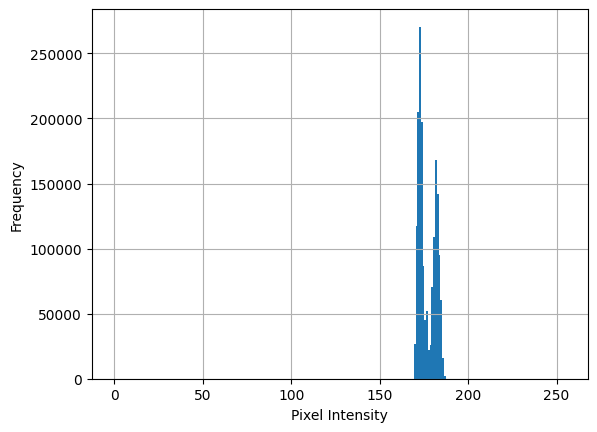

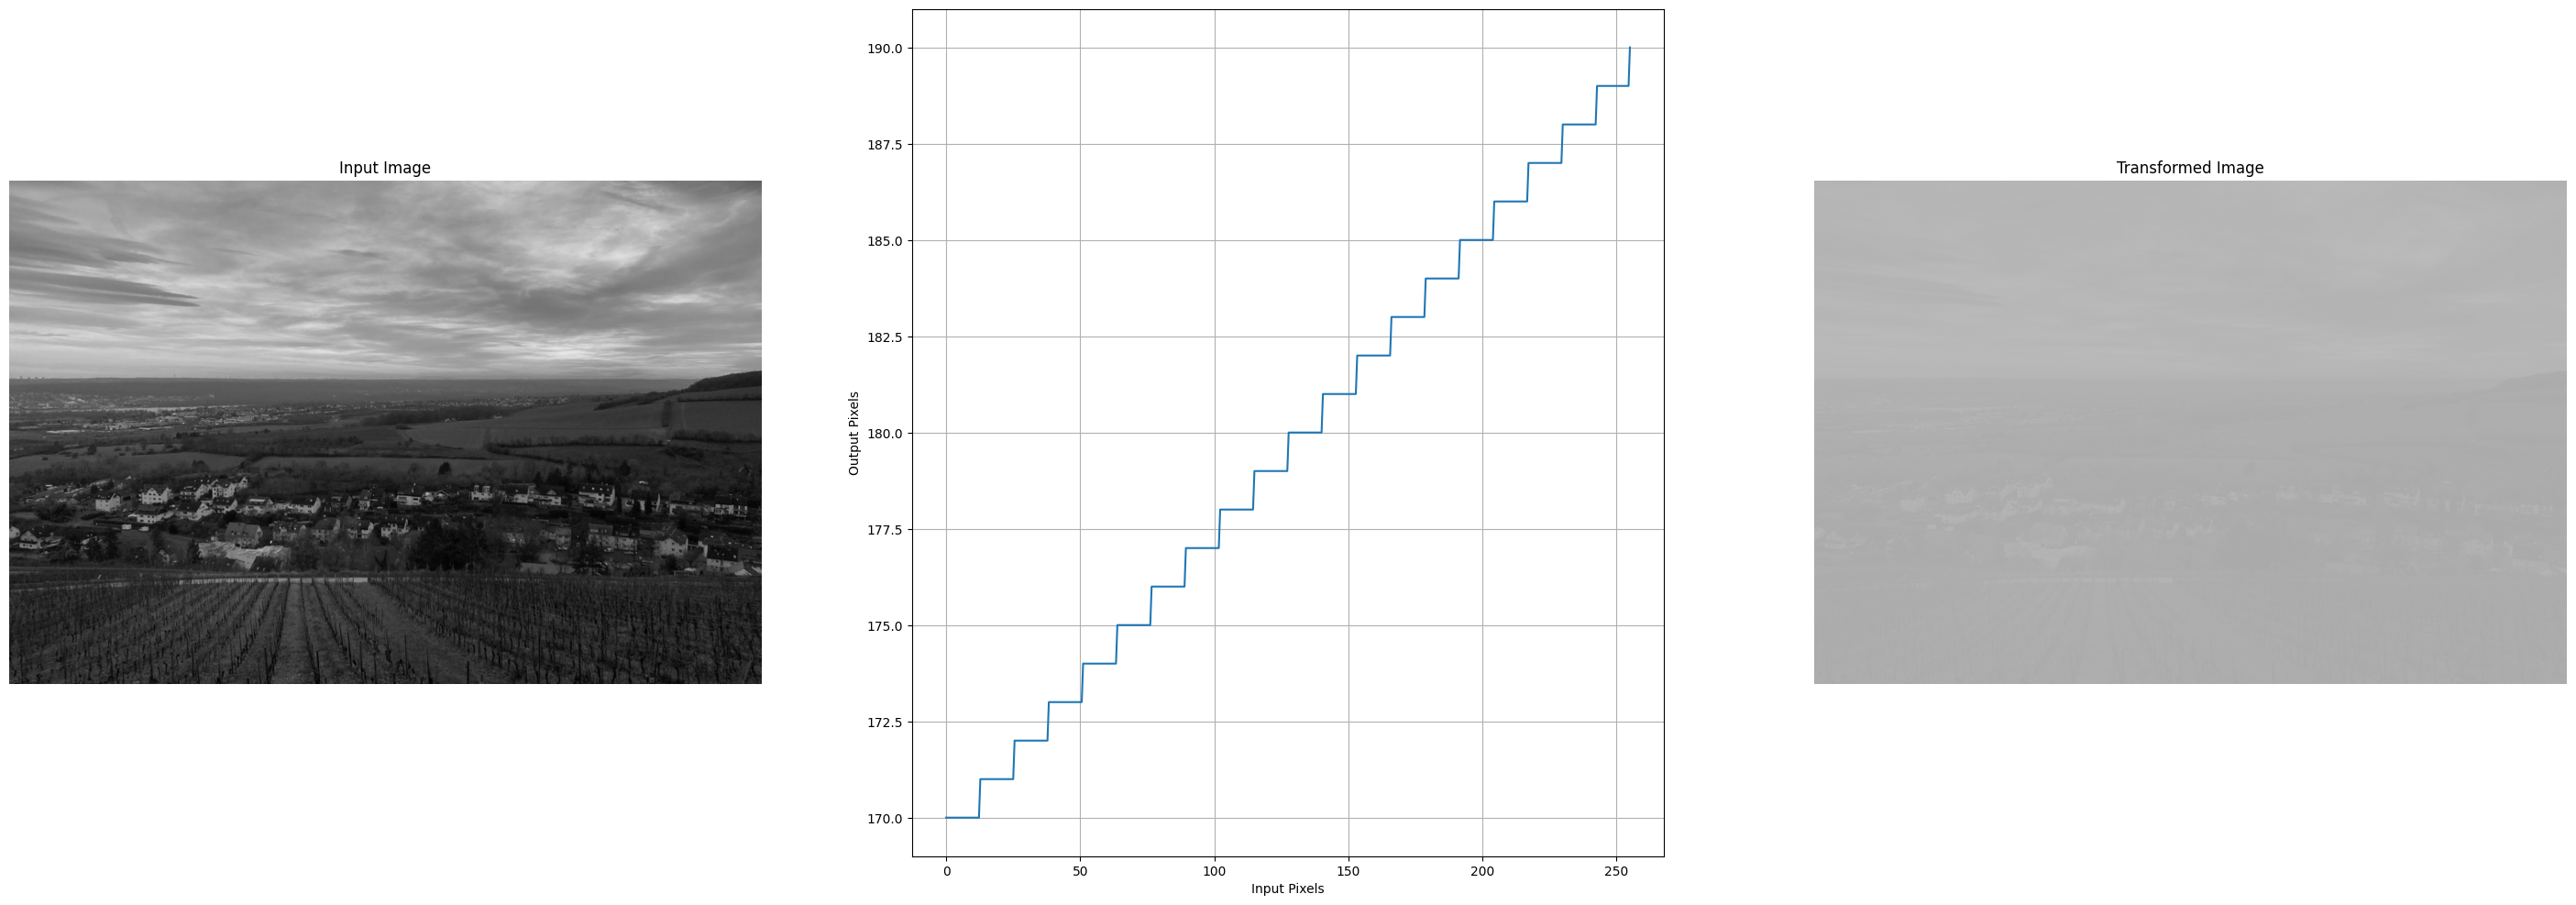

In [52]:
thresh_0 = 170
thresh_255 = 190

def konstrast_spreizung_stauchung(picture,th0,th255):
    I_max = np.max(picture)
    I_min = np.min(picture)
    return np.array((picture - I_min) / (I_max - I_min) * (th255 - th0) + th0).astype(int)

y_vals = konstrast_spreizung_stauchung(x_vals,thresh_0,thresh_255)
gestaucht = konstrast_spreizung_stauchung(grey,thresh_0,thresh_255)
plot_histogram(gestaucht)

plot_results(grey, konstrast_spreizung_stauchung(grey,thresh_0,thresh_255), x_vals,y_vals)

### Contrast Stretching
Contrast stretching expands the range of intensity values in an image to use the full available range.\
This enhances the difference between dark and bright areas, making details more visible. \
The function is the same just with setting $t_0$ to 0 or a lower value as $min(P)$ and $t_1$ to 0 or a lower value as $max(P)$.

Total number of pixels: 1712000
Image dimensions: (1070, 1600)
Storage usage (KB): 1671.875


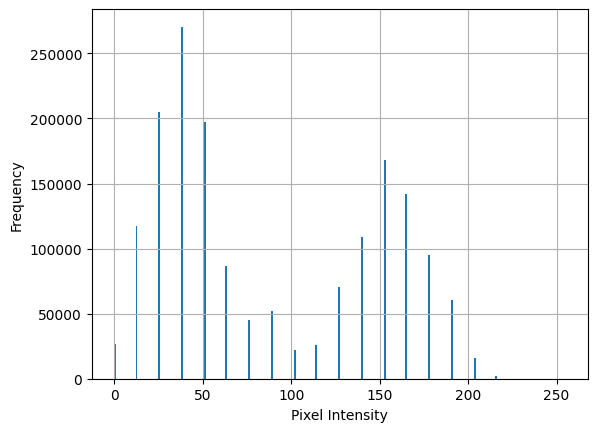

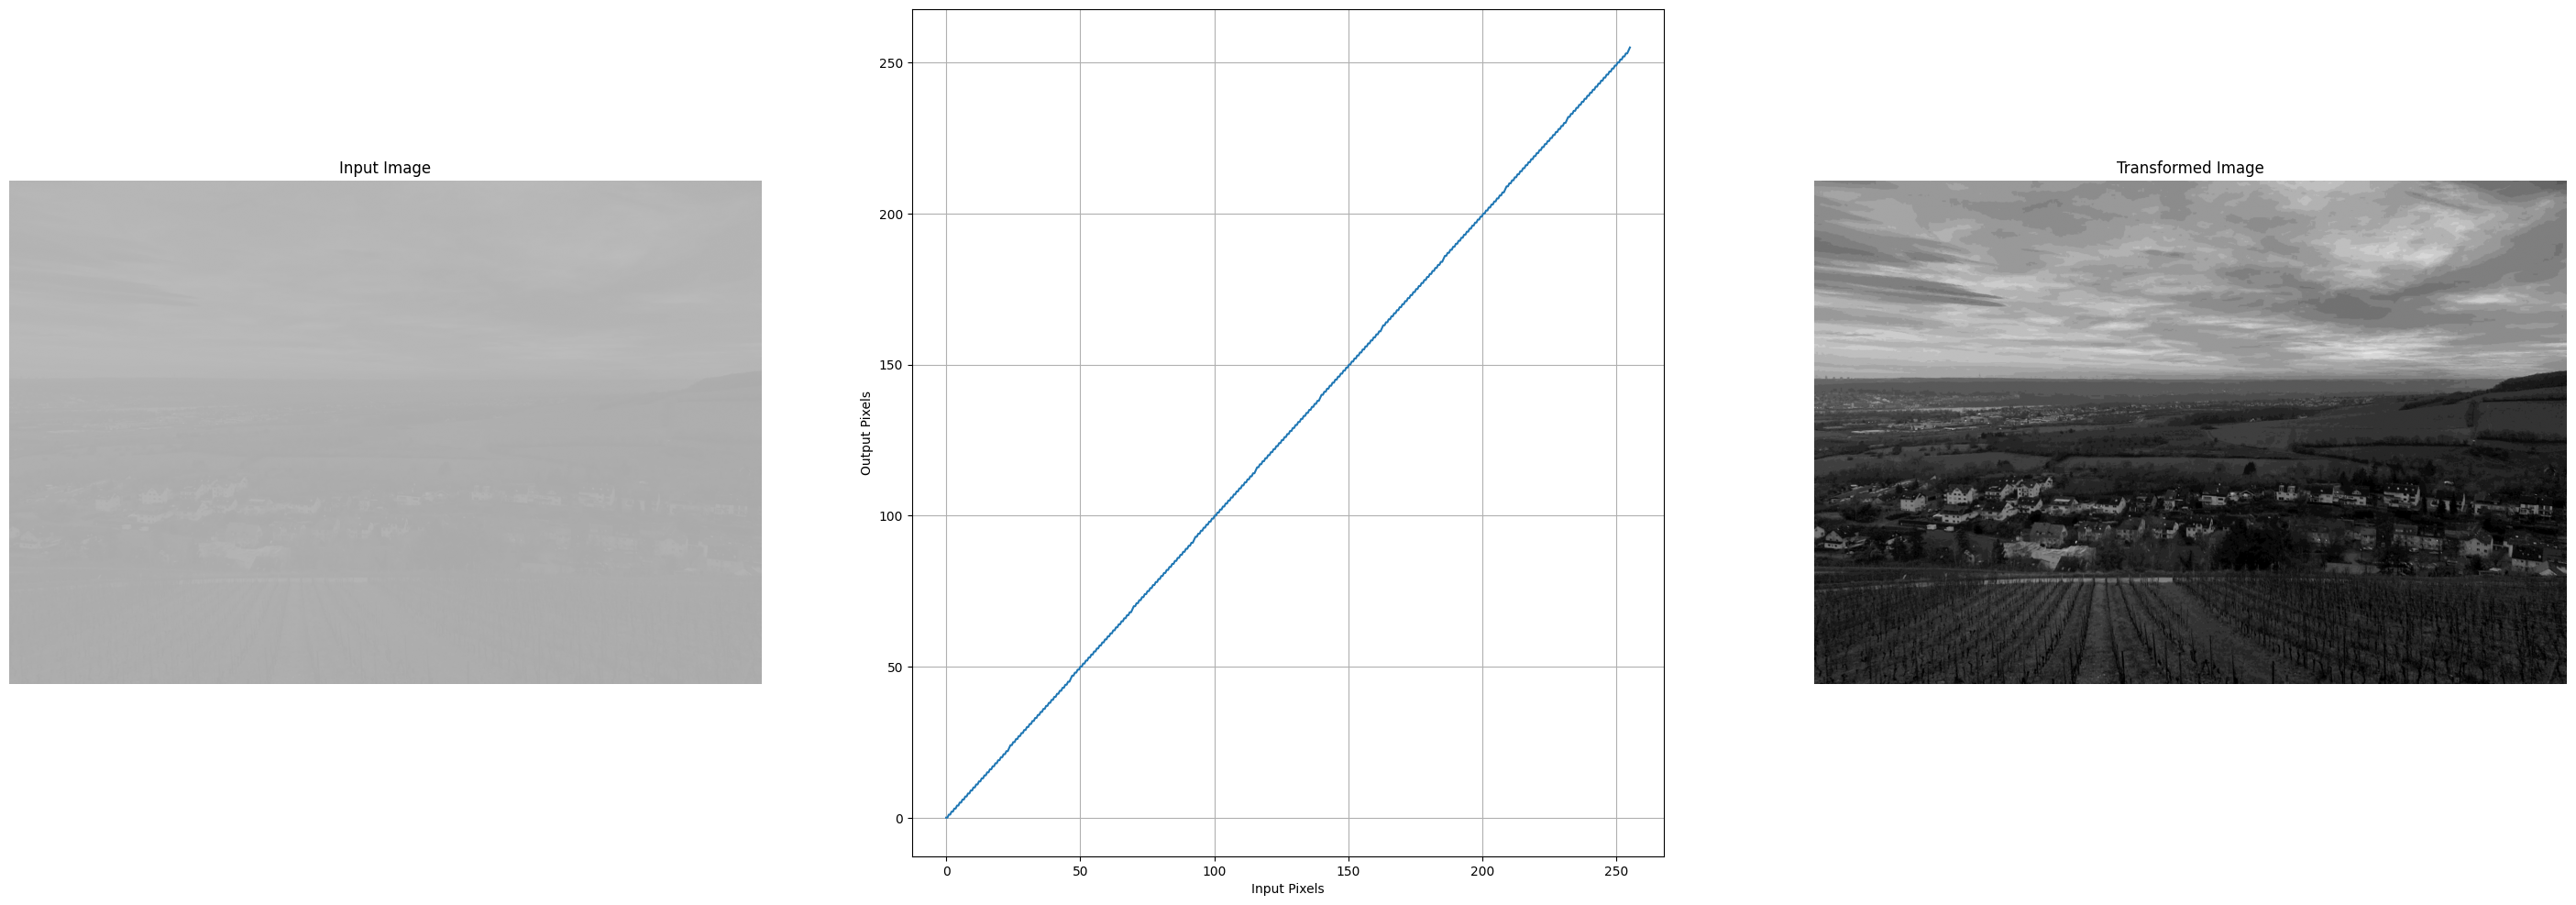

In [50]:
th_low = 0
th_high = 255
y_vals = konstrast_spreizung_stauchung(x_vals,th_low,th_high)
gespreizt = konstrast_spreizung_stauchung(gestaucht,th_low,th_high)
plot_histogram(gespreizt)


plot_results(gestaucht, gespreizt, x_vals,y_vals)


## Histogrammausgleich
Let me explain histogram equalization in image processing. This is a powerful technique that automatically adjusts image contrast by effectively spreading out the most frequent intensity values in an image.

Total number of pixels: 1712000
Image dimensions: (1070, 1600)
Storage usage (KB): 1671.875


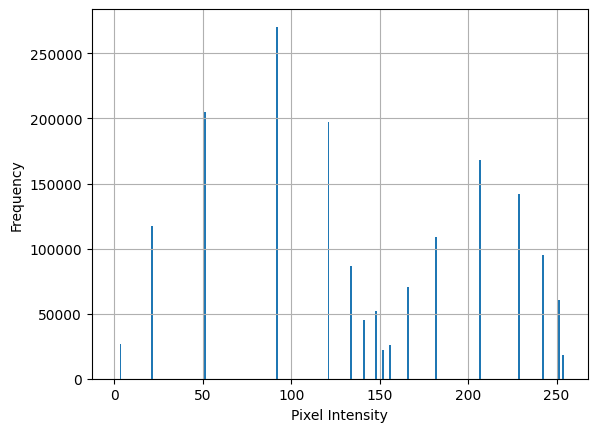

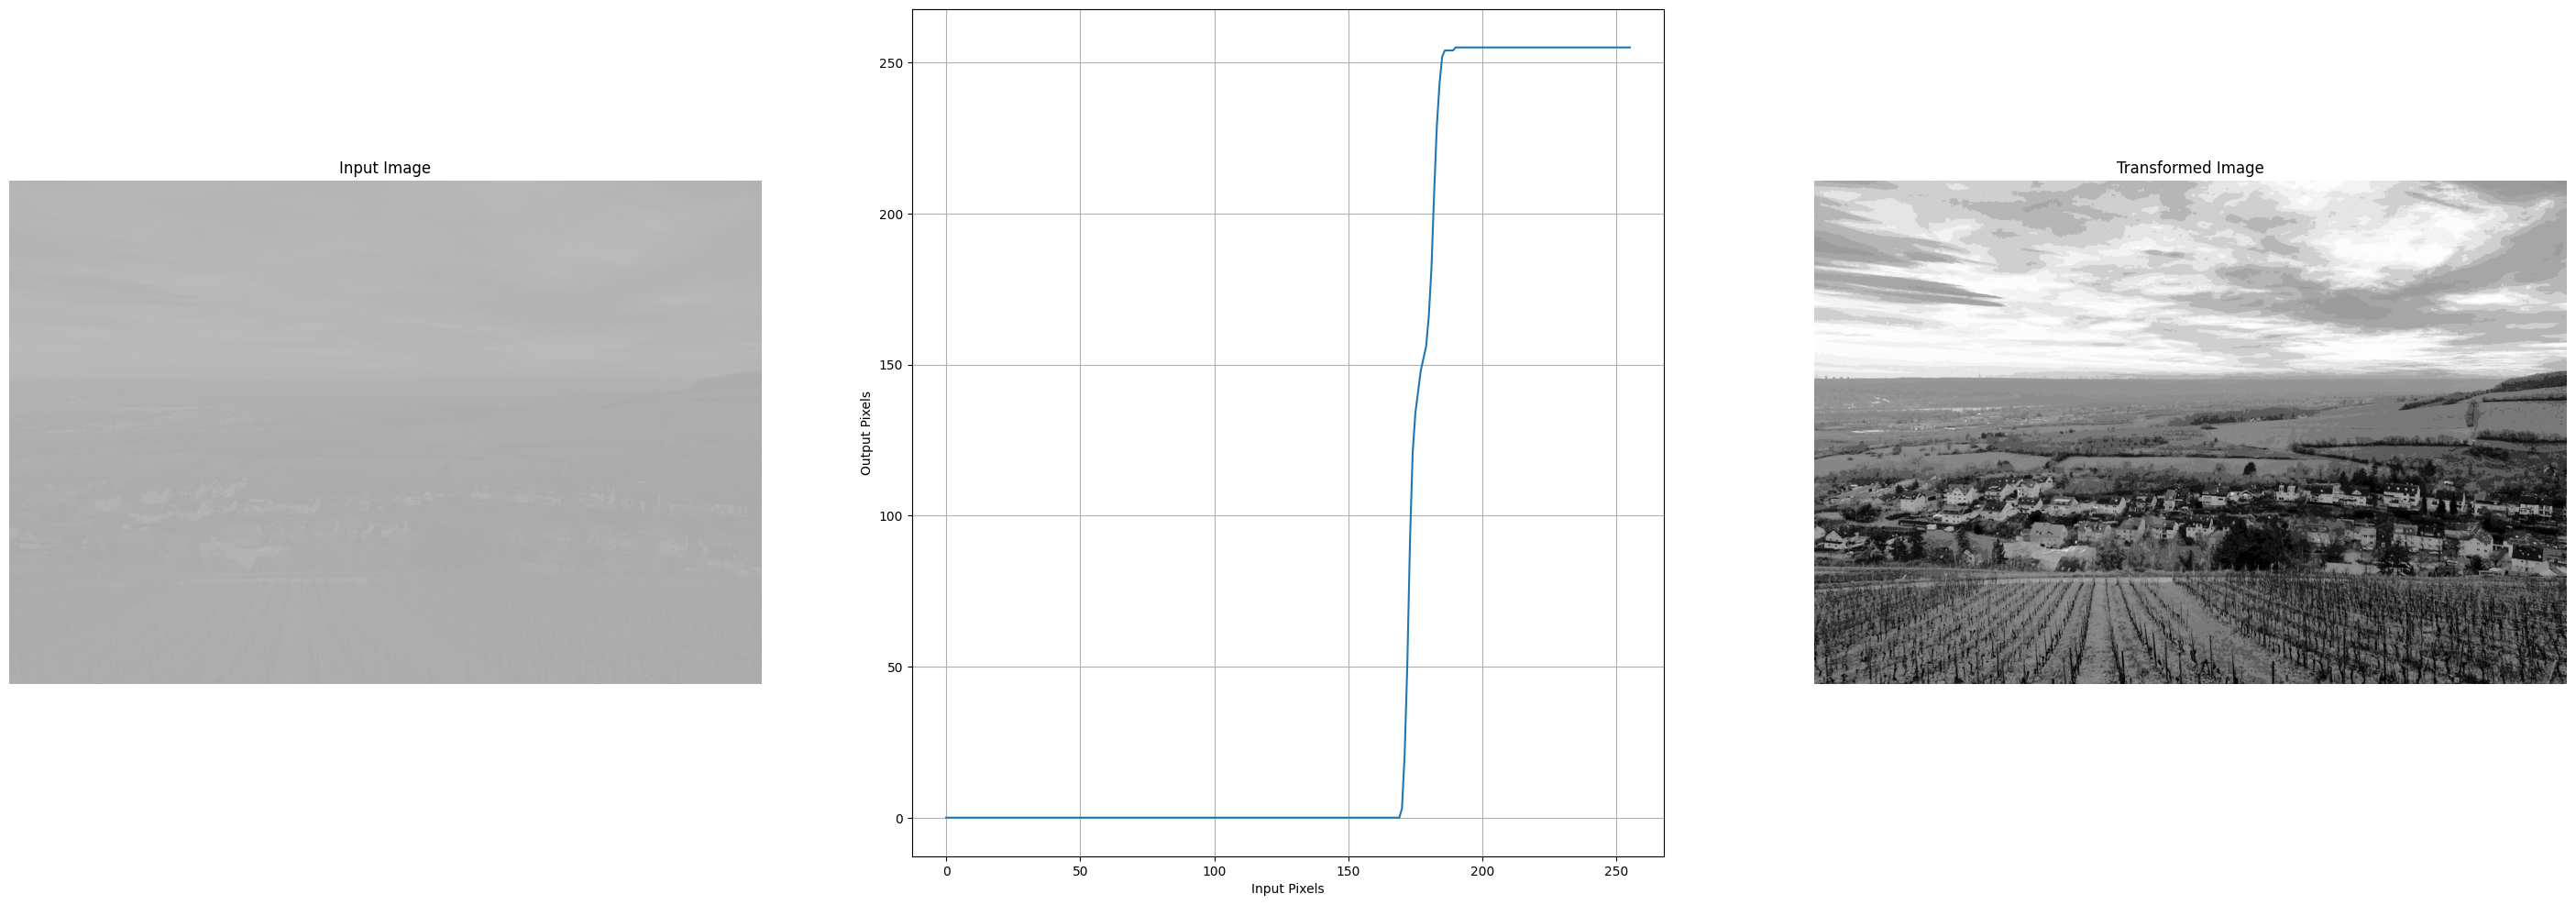

In [44]:
input_picture = gestaucht

hista, bins = np.histogram(input_picture.flatten(), bins=256, range=[0, 256])
norm_histo = hista/input_picture.size
# Kumolative Summe auf das normierte Histogramm für die cdf
cdf = norm_histo.cumsum()
# CDF jetzt auf den bereich 0-255 spreizen
norm_cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
# integer umwandlung
norm_cdf = norm_cdf.astype('uint8')
equalized = norm_cdf[input_picture]
# berechnung der y werte mit 'neuen' x-werten
y_vals = norm_cdf[np.arange(256)]


plot_histogram(equalized)
plot_results(input_picture, equalized, np.arange(256), y_vals)


## Magnitude Spectrum
The spatial and frequency domains are two fundamental ways to represent and analyze digital images.<br /><br />
The spatial domain shows an image as we naturally see it: a collection of pixels with specific brightness values at defined coordinates (x,y). \
Each pixel's position and intensity directly contribute to what humans see. When humans look at a digital photo, they're viewing it in the spatial domain.<br /><br />
The frequency domain transforms this same image to show how quickly pixel values change across the image as sum of many sinusoidal functions.\
Instead of showing individual pixels, it reveals patterns and variations. Low frequencies represent gradual changes like smooth color transitions, while high frequencies show rapid changes like edges and fine details.

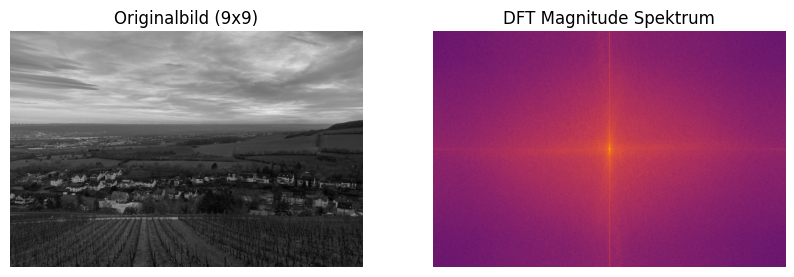

In [53]:
# DFT auf das Bild anwenden
f_transform = np.fft.fft2(grey)
f_transform_shifted = np.fft.fftshift(f_transform)

# Magnitude Spektrum berechnen
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Bild und Frequenzspektrum anzeigen
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(grey, cmap='gray')
plt.title('Originalbild (9x9)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='inferno')
plt.title('DFT Magnitude Spektrum')
plt.axis('off')

plt.show()